In [45]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import string
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [4]:
df = pd.read_csv('data/cleaned_records_bibs.csv', delimiter='|')

## Number of sources

In [5]:
len(df)

8277

## Number of publications by year

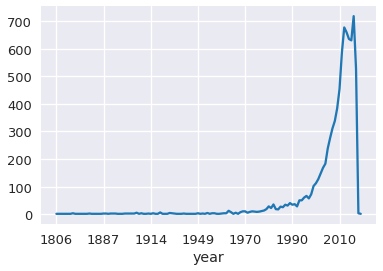

In [6]:
year_df = df.groupby(['year'])['id'].count()
year_df.plot()

## 20 Years with more publications

In [9]:
top_year = year_df.sort_values(ascending=False)
t_year = top_year.reset_index()[:20]
t_year

,year,id
0,2016,719
1,2012,678
2,2013,660
3,2014,636
4,2015,631
5,2011,586
6,2017,527
7,2010,454
8,2009,384
9,2008,338


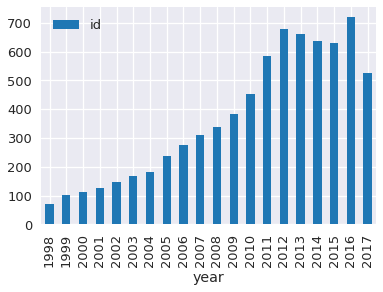

In [10]:
t_year = t_year.set_index('year')
t_year = t_year.sort_index()
t_year.plot(kind='bar')

## Number of publications by Decade

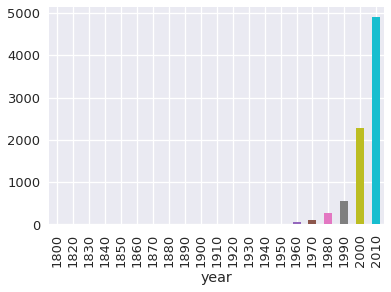

In [11]:
year_df = year_df.reset_index()
decade = lambda x : int(str(x)[:3] + '0')
year_df['year'] = year_df['year'].map(decade)
year_df = year_df.groupby(['year'])['id'].sum()
year_df.plot(kind='bar')

In [12]:
year_df.reset_index()

,year,id
0,1800,1
1,1820,1
2,1830,1
3,1840,3
4,1850,8
5,1860,4
6,1870,4
7,1880,5
8,1890,9
9,1900,20


## Number of publications by Language

In [13]:
lang_df = df.groupby(['lang'])['id'].count()
lang_df.reset_index()

,lang,id
0,English,7743
1,Spanish,534


## Number of publications by Type

In [14]:
type_df = df.groupby(['type'])['id'].count()
type_df.reset_index()

,type,id
0,article,5355
1,book,2746
2,inproceedings,176


## Number of publications by country of publisher

In [15]:
c_df = df.groupby(['country_publication'])['id'].count()
c_df = c_df.sort_values(ascending=False)

In [16]:
pd.DataFrame(c_df).reset_index()

,country_publication,id
0,United States,5257
1,United Kingdom,139
2,Canada,129
3,Spain,100
4,Germany,56
5,Mexico,25
6,Netherlands,18
7,Argentina,17
8,Chile,12
9,Colombia,8


## 20 publishers with more number of publications

In [17]:
p_df = df.groupby(['publisher'])['id'].count()
p_df = p_df.sort_values(ascending=False)
p_df.reset_index()[:20]

,publisher,id
0,Routledge Taylor Francis Group,1068
1,Cambridge University Press,456
2,Oxford University Press,327
3,Wiley - Blackwell Publ,315
4,Palgrave Macmillan,182
5,Sage Publ,160
6,Ashgate Publ,141
7,Johns Hopkins University Press,100
8,Duke University Press,87
9,University Chicago Press,71


## Publications by source

In [19]:
s_df = df.groupby(['source'])['id'].count()
s_df = s_df.sort_values(ascending=False)
s_df.reset_index()[:20]

,source,id
0,Scopus,3601
1,Web of Science,3266
2,Google Books,1410


## Publications by journals

In [60]:
j_df = df.groupby(['journal'])['id'].count()
j_df = j_df.sort_values(ascending=False)
j_df.reset_index()[:11]

,journal,id
0,Google Books,1410
1,Journal of Transatlantic Studies,376
2,Journal of American History,82
3,American Historical Review,76
4,Slavery And Abolition,63
5,International Affairs,61
6,Journal of American Studies,49
7,Atlantic Studies Global Currents,48
8,International Politics,39
9,Survival,37


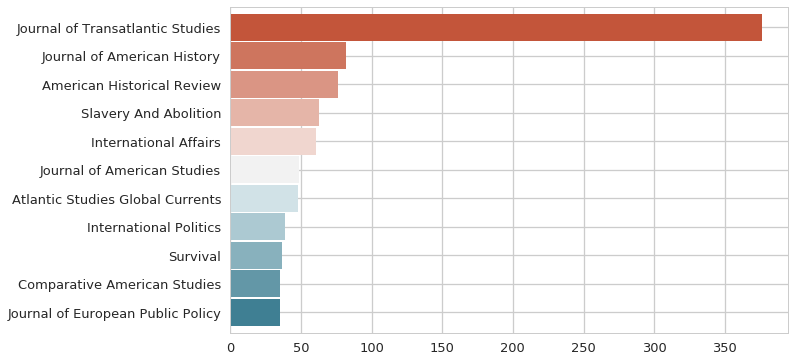

In [61]:
sns.set_style('whitegrid')
ja_df = j_df[1:12].sort_values(ascending=True)
ax = ja_df.plot.barh(figsize=(10, 6),color=sns.diverging_palette(220, 20, n=11), width=0.95)
ax.set_ylabel("");
plt.savefig('imgs/Figure1.png', dpi=100, bbox_inches = 'tight')

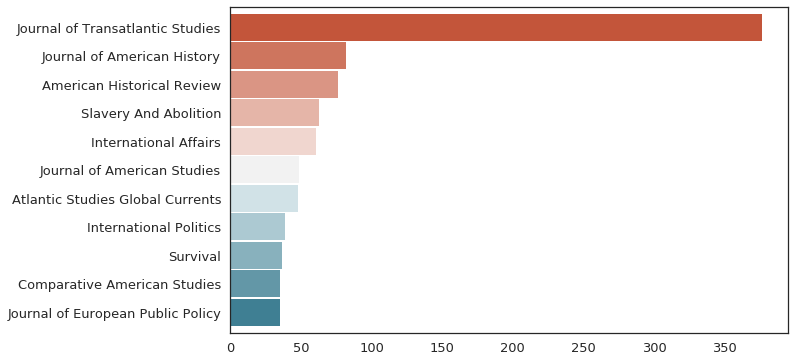

In [62]:
sns.set_style('white')
ax = ja_df.plot.barh(figsize=(10, 6),color=sns.diverging_palette(220, 20, n=11), width=0.95)
ax.set_ylabel("");
plt.savefig('imgs/Figure2.png', dpi=100, bbox_inches = 'tight')

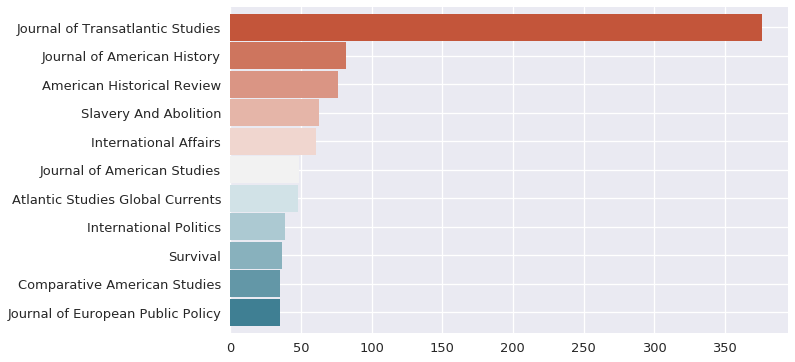

In [63]:
sns.set_style('darkgrid')
ax = ja_df.plot.barh(figsize=(10, 6),color=sns.diverging_palette(220, 20, n=11), width=0.95)
ax.set_ylabel("");
plt.savefig('imgs/Figure3.png', dpi=100, bbox_inches = 'tight')

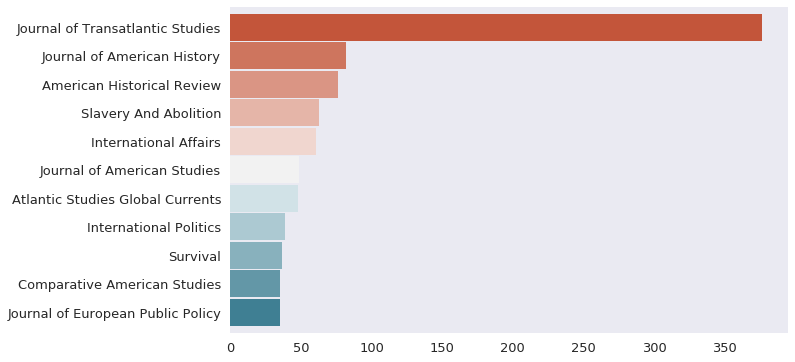

In [64]:
sns.set_style('dark')
ax = ja_df.plot.barh(figsize=(10, 6),color=sns.diverging_palette(220, 20, n=11), width=0.95)
ax.set_ylabel("");
plt.savefig('imgs/Figure4.png', dpi=100, bbox_inches = 'tight')

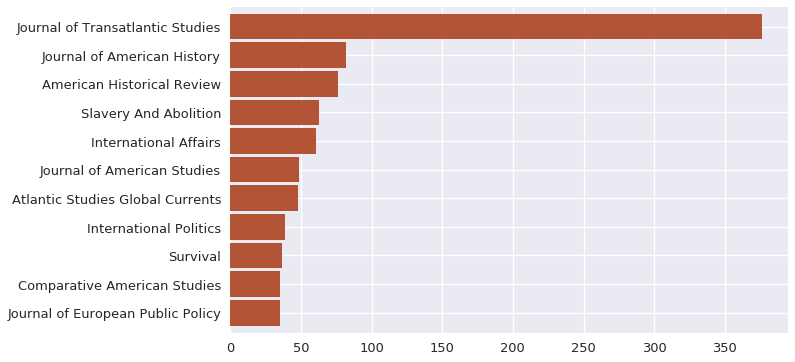

In [65]:
sns.set_style('darkgrid')
ax = ja_df.plot.barh(figsize=(10, 6),color="#B45437", width=0.9)
ax.set_ylabel("");
plt.savefig('imgs/Figure5.png', dpi=100, bbox_inches = 'tight')

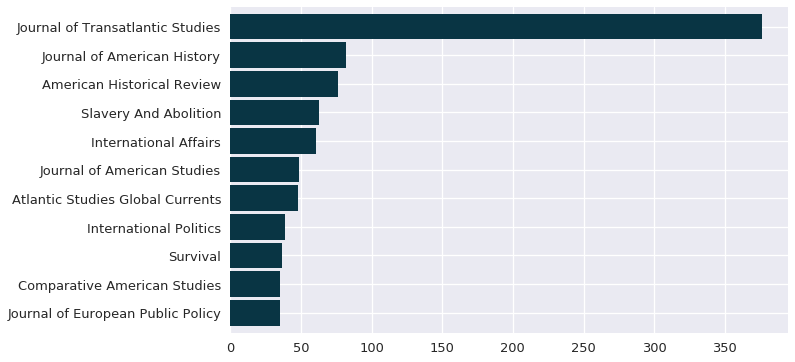

In [70]:
sns.set_style('darkgrid')
ax = ja_df.plot.barh(figsize=(10, 6),color=["#093544" ], width=0.9)
ax.set_ylabel("");
plt.savefig('imgs/Figure6.png', dpi=100, bbox_inches = 'tight')

In [71]:
j_df = j_df.reset_index()[:20]
j_df.to_csv("data/journals.csv", sep = "\t")

## Publications by authors' affiliation

In [72]:
a_df = df.groupby(['affiliation'])['id'].count()
a_df = a_df.sort_values(ascending=False)
a_df.reset_index()[:20]

,affiliation,id
0,University London,108
1,Harvard University,45
2,University of California,42
3,Johns Hopkins University,38
4,Georgetown University,34
5,Brown University,32
6,Queens University,26
7,Columbia University,26
8,Yale University,26
9,University North Carolina,21


In [73]:
a_df.reset_index()['id'].sum()

4586

In [74]:
a_df.to_csv("data/affiliations.csv", sep = "|")

## Publication by Country of Authors's Affiliation

In [75]:
#fixing countries
import json
def getCountryBySpanishName(name, countries):
    for k in countries.keys():
            if countries[k] == name:   
                return k
            
countries = json.load(open('../lexicon/world_countries_en_es.json'))
for index, row in df.iterrows():
    try:
        if type(row['affiliation_pais']) == float:
            continue
        row['affiliation_pais'] = row['affiliation_pais'].strip()
        if row['affiliation_pais'] in ['EEUU', 'USA', 'E.E.U.U', 'EE.UU', 'Estados Unidos', 'US']:
            row['affiliation_pais'] = 'United States'
        if row['affiliation_pais'] in countries.values():
            df.at[index, 'affiliation_pais'] = getCountryBySpanishName(row['affiliation_pais'], countries)
        else:
            df.at[index, 'affiliation_pais'] = row['affiliation_pais']
    except:
        print(index, row)
        

In [76]:
ac_df = df.groupby(['affiliation_pais'])['id'].count()
ac_df = ac_df.sort_values(ascending=False)
ac_df.reset_index()[:20]

,affiliation_pais,id
0,United States,1390
1,United Kingdom,646
2,Canada,339
3,Germany,319
4,France,165
5,Italy,133
6,Belgium,123
7,Spain,119
8,Netherlands,114
9,Australia,77


In [48]:
ac_df.to_csv("data/affiliations_country.csv", sep = "|")

In [49]:
ac_df['United States']

1390

In [50]:
matplotlib.rcParams['figure.figsize'] = (12.0,10.0)

In [57]:
        
spanish = [
 'Bermuda',
 'Cameroon',
 'Cape Verde',
 'Congo',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Gibraltar',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Nicaragua',
 'Panama',
 'Uruguay',
 'Puerto Rico', 
'United States',
'United Kingdom',
'Canada',
'Germany',
'France',
'Italy',
'Spain',
'Austria',
'South Africa',
'Brazil',
'India',
'Russia',
'Portugal',
'Mexico',
'Argentina',
'Chile',
'Colombia',
'Iran',
'Dominica',
'Peru',
'Cuba',
'Bolivia',
'Trinidad and Tobago',
'Bahamas',
'Barbados',
'México',
'Costa Rica',
'Jamaica',
'Venezuela, Bolivarian Republic of']


In [60]:
for i, a in ac_df.iteritems():
    if i not in spanish:
        ac_df = ac_df.drop(i)

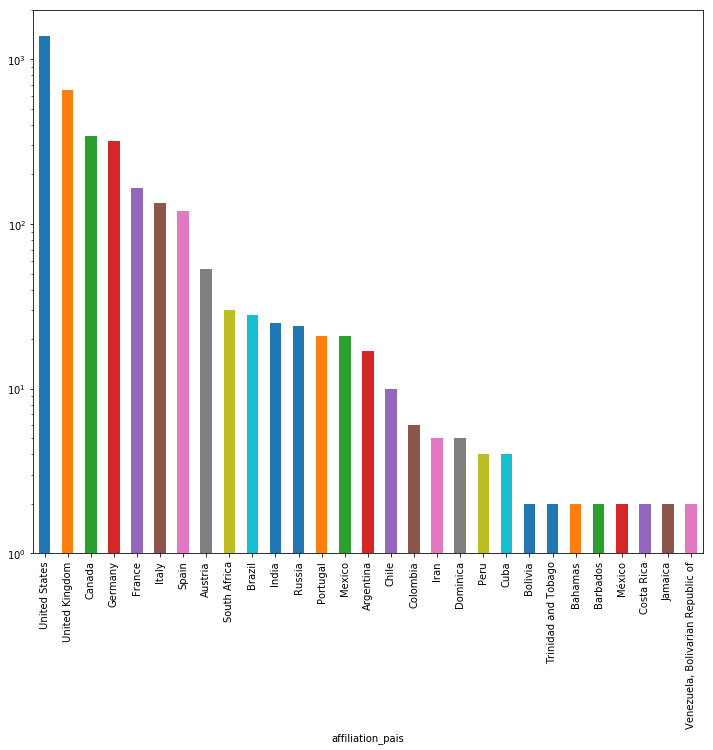

In [62]:
ac_df.plot(kind='bar', log='x')